#     AIR QUALITY PREDICTION

### - **PROBLEM STATEMENT**

- Prediction of pollution is an increasingly important problem. It can impact individuals and their health, e.g. asthma patients can be greatly affected by air pollution.

- Traditional air pollution prediction methods have limitations. Machine learning provides one approach that can offer new opportunities for prediction of air pollution. There are however many different machine learning approaches and identifying the best one for the problem at hand is often challenging. 

- So we are predicting the Air Quality

### - AIM OF THE PROJECT

We will predict the **Relative Humidity** of a given point of time based on the all other attributes affecting the change in RH.

### - MACHINE LEARNING MODEL USED

 In the Air Quality Prediction Problem, as the name suggests it is a **Prediction** problem.
 - I am going to use **Linear Regression** , **Decision Tree Regression** and **Grid SearchCV** Machine Learning models.
  

**Attributes Of the Dataset are:**

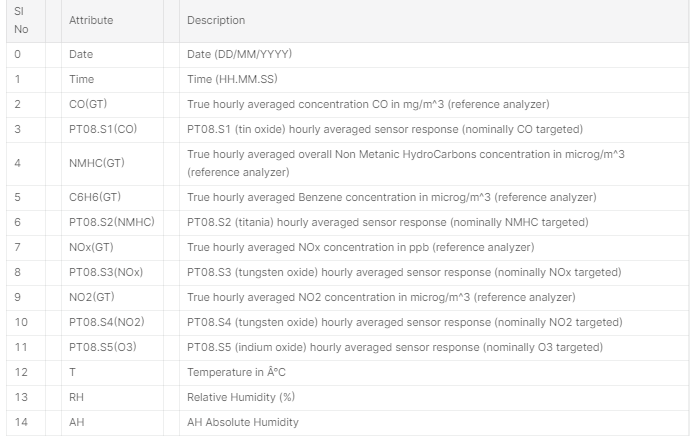

### DATA COLLECTION :

- DATASET - [Air_Quality_Dataset](https://archive.ics.uci.edu/ml/datasets/Air+quality)
- Where does the data come from: UCI Machine Learning Repository
- **DESCRIPTION**:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. 

Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses.

Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.

Missing values are tagged with -200 value.

### DATA CLEANING :

#### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading Data

In [2]:
Air_Quality=pd.read_excel('C:\\Users\\DELL\Documents\\AirQualityUCI\\AirQualityUCI.xlsx')
Air_Quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
# Setting 'Date' column has Index
Air_Quality=Air_Quality.set_index('Date')
Air_Quality

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649


In [4]:
Air_Quality.shape

(9357, 14)

In [5]:
Air_Quality.tail()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [6]:
# Changing Missing values to Nan
Air_Quality=Air_Quality.replace({'CO(GT)':-200,'PT08.S1(CO)':-200,'NMHC(GT)':-200,'C6H6(GT)':-200,'PT08.S2(NMHC)':-200,
                            'NOx(GT)':-200,'PT08.S3(NOx)':-200,'NO2(GT)':-200,'PT08.S4(NO2)':-200,
                            'PT08.S5(O3)':-200,'T':-200,'RH':-200,'AH':-200},np.nan)
Air_Quality

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04,10:00:00,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
2005-04-04,11:00:00,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
2005-04-04,12:00:00,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649


In [7]:
# Missing values in each column
Air_Quality.isnull().sum()

Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

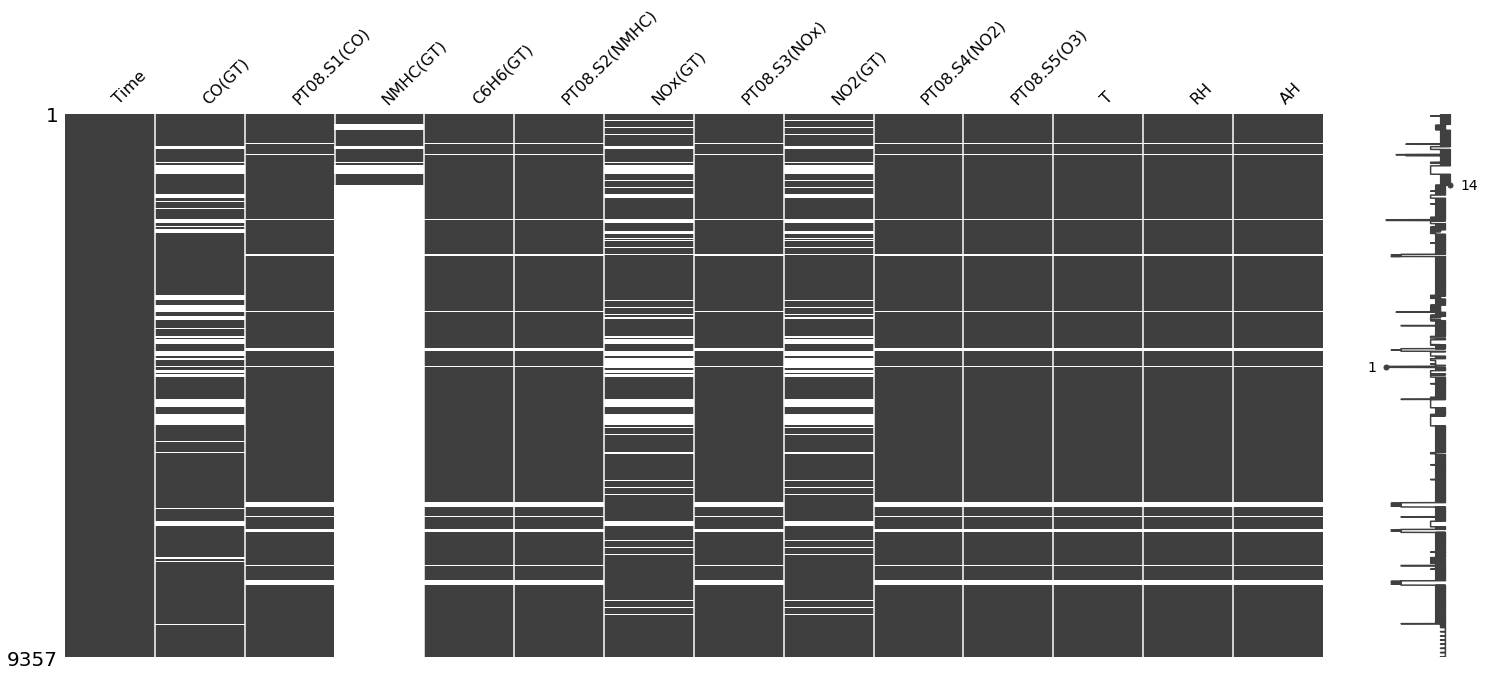

In [8]:
import missingno as msno
msno.matrix(Air_Quality)

In [9]:
# Since there are 80-90 % of missing values from NMHC(GT) column will 
Air_Quality.drop('NMHC(GT)',axis=1,inplace=True)
Air_Quality.head()

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


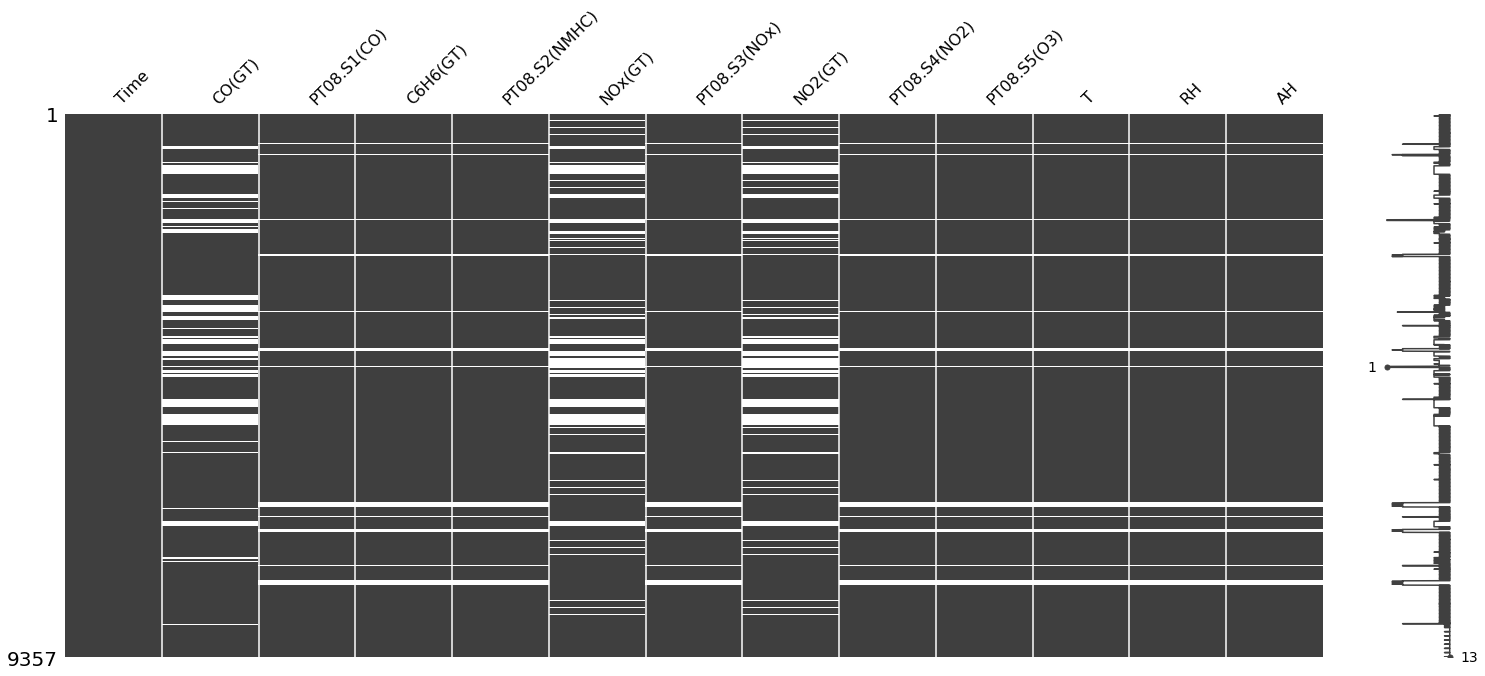

In [10]:
# There are about 30% missing values in C0_GT,NOX_GT,NO2_GT columns Which can be filled with avearge Mean 
import missingno as msno
msno.matrix(Air_Quality)

In [11]:
#droping end rows with NaN values
Air_Quality.dropna(how='all',inplace=True) 
#drop RH NAN rows
Air_Quality.dropna(thresh=10,axis=0,inplace=True)

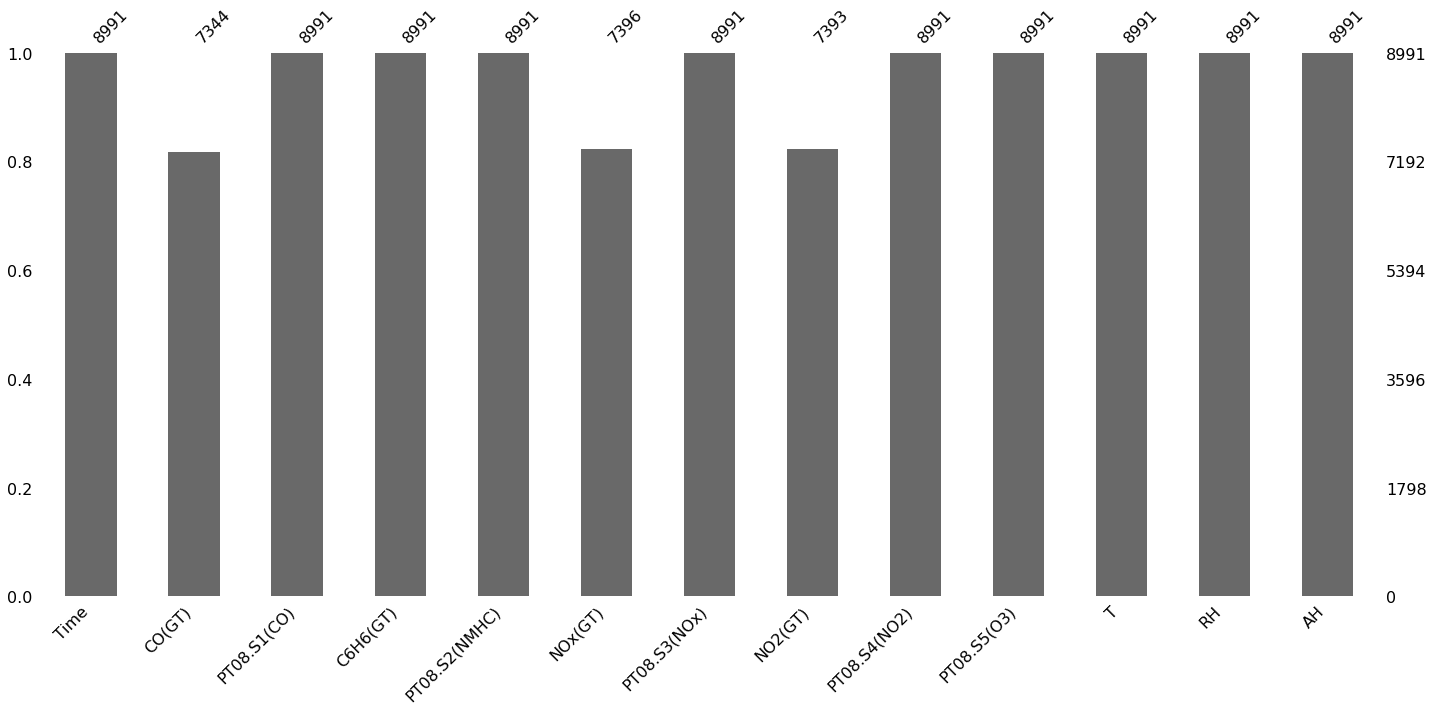

In [12]:
msno.bar(Air_Quality)

In [13]:
Air_Quality.mean()

CO(GT)              2.129711
PT08.S1(CO)      1099.707856
C6H6(GT)           10.082993
PT08.S2(NMHC)     939.029205
NOx(GT)           242.174351
PT08.S3(NOx)      835.370973
NO2(GT)           112.129974
PT08.S4(NO2)     1456.143486
PT08.S5(O3)      1022.780725
T                  18.316054
RH                 49.232360
AH                  1.025530
dtype: float64

In [14]:
# Applying Mean Imputation to fill Nan Valus of C0_GT,NOX_GT,NO2_GT columns
Air_Quality=Air_Quality.fillna(Air_Quality.mean())
Air_Quality

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04,10:00:00,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
2005-04-04,11:00:00,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
2005-04-04,12:00:00,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649


In [15]:
# Checking any missing values
Air_Quality.isnull().sum()

Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [16]:
Air_Quality.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.129711,1099.707856,10.082993,939.029205,242.174351,835.370973,112.129974,1456.143486,1022.780725,18.316054,49.232360,1.025530
std,1.298237,217.084571,7.449640,266.829000,187.110477,256.815106,43.179743,346.204540,398.480897,8.832888,17.316389,0.403813
min,0.100000,647.250000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.200000,936.750000,4.436942,734.375000,112.000000,657.875000,85.000000,1226.625000,731.375000,11.787500,35.812500,0.736769
50%,2.129711,1063.000000,8.239851,909.000000,227.000000,805.500000,112.129974,1462.750000,963.250000,17.750000,49.550000,0.995395
75%,2.600000,1231.250000,13.988478,1116.250000,280.000000,969.250000,132.000000,1673.500000,1273.375000,24.400000,62.500001,1.313701
max,11.900000,2039.750000,63.741476,2214.000000,1479.000000,2682.750000,332.600000,2775.000000,2522.750000,44.600000,88.725000,2.231036


### DATA VISUALIZATION :

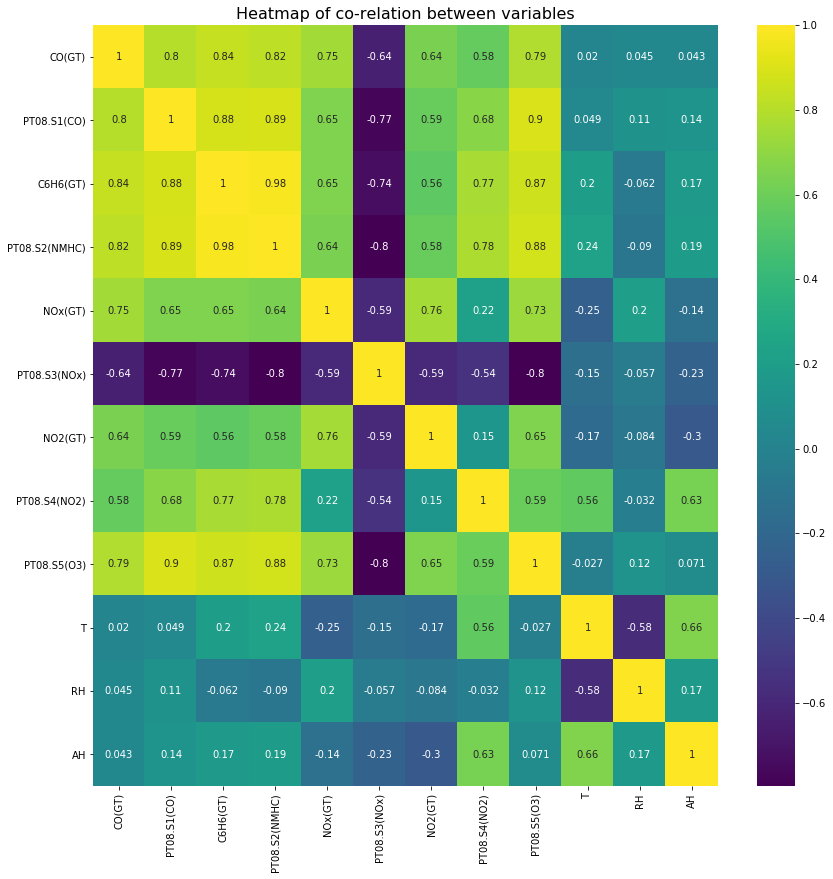

In [17]:
# Using Heatmap to see correlation between variables
plt.figure(figsize=(14, 14))
sns.heatmap(Air_Quality.corr(), annot=True, cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

### My output column is the RH column and features(input columns) is the rest of the columns

In [18]:
# Ploting relation between RH column and Features

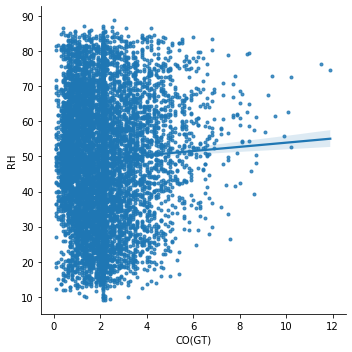

In [19]:
sns.lmplot(x='CO(GT)',y='RH',data=Air_Quality,markers='.')

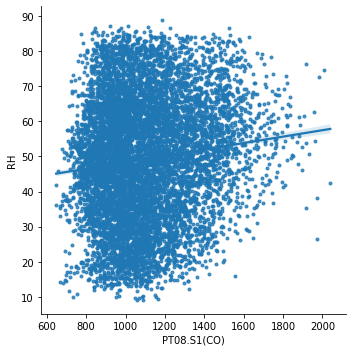

In [20]:
sns.lmplot(x='PT08.S1(CO)',y='RH',data=Air_Quality,markers='.')

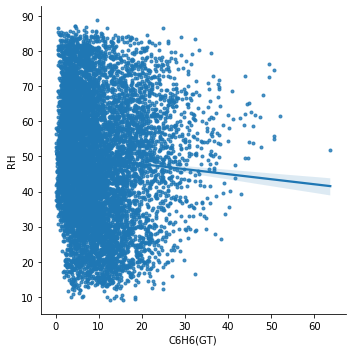

In [21]:
sns.lmplot(x='C6H6(GT)',y='RH',data=Air_Quality,markers='.')

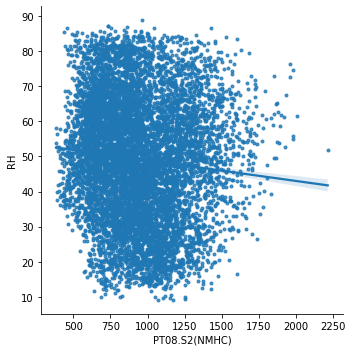

In [22]:
sns.lmplot(x='PT08.S2(NMHC)',y='RH',data=Air_Quality,markers='.')

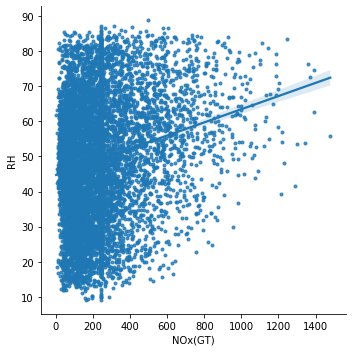

In [23]:
sns.lmplot(x='NOx(GT)',y='RH',data=Air_Quality,markers='.')

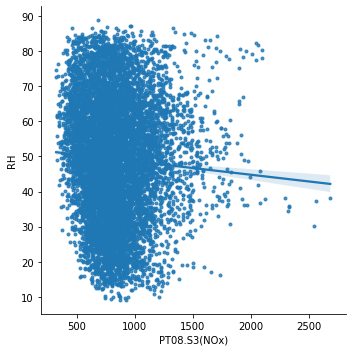

In [24]:
sns.lmplot(x='PT08.S3(NOx)',y='RH',data=Air_Quality,markers='.')

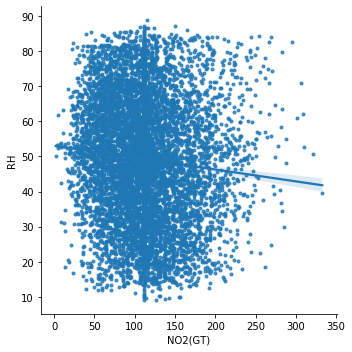

In [25]:
sns.lmplot(x='NO2(GT)',y='RH',data=Air_Quality,markers='.')

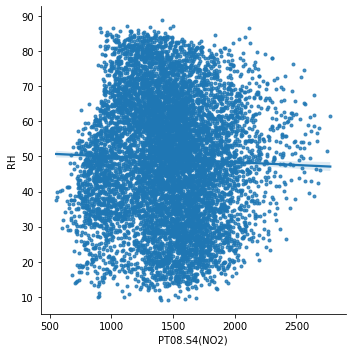

In [26]:
sns.lmplot(x='PT08.S4(NO2)',y='RH',data=Air_Quality,markers='.')

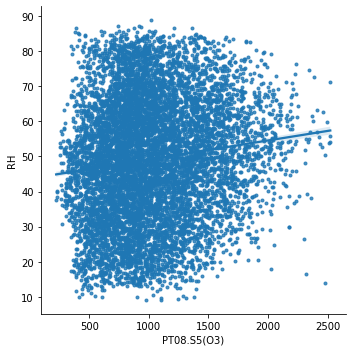

In [27]:
sns.lmplot(x='PT08.S5(O3)',y='RH',data=Air_Quality,markers='.')

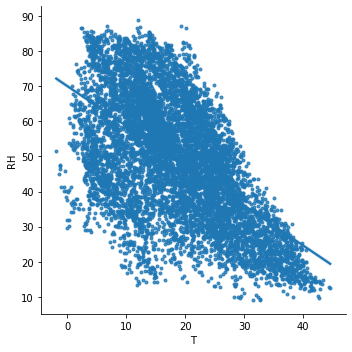

In [28]:
sns.lmplot(x='T',y='RH',data=Air_Quality,markers='.')

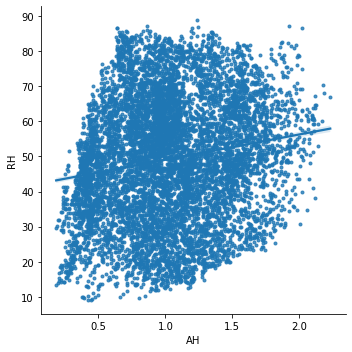

In [29]:
sns.lmplot(x='AH',y='RH',data=Air_Quality,markers='.')

### TRAIN AND TEST DATA :

In [30]:
# Spliting the data into Input and Output
inpcol=Air_Quality.columns.tolist()[2:] # Input Columns
X=Air_Quality[inpcol].drop('RH',1)     #X-input features
y=Air_Quality['RH']                    #y-input features

In [31]:
# Divide the X and y into train and test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size= 0.3,random_state=42)

#### Build the model on Training data--> X_train and y_train

### Linear Regression

In [32]:
# Sklearn library: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (6293, 10)
Test data size: (2698, 10)


In [34]:
# Intercept and the coefficient values
print(lm.intercept_)
lm.coef_

34.74062514709794


array([ 8.84944501e-03, -8.51167911e-01,  1.63256317e-03,  1.86059426e-02,
       -1.04013965e-03, -4.35652866e-02,  1.52211178e-02, -1.37333335e-03,
       -2.28850830e+00,  3.33199476e+01])

In [35]:
## Create a dataframe for coefficients
coefficients = pd.DataFrame([X_train.columns, lm.coef_]).T
coefficients

,0,1
0,PT08.S1(CO),0.00884945
1,C6H6(GT),-0.851168
2,PT08.S2(NMHC),0.00163256
3,NOx(GT),0.0186059
4,PT08.S3(NOx),-0.00104014
5,NO2(GT),-0.0435653
6,PT08.S4(NO2),0.0152211
7,PT08.S5(O3),-0.00137333
8,T,-2.28851
9,AH,33.3199


In [36]:
# INTERCEPT AND SLOPE
print('Intercept:',lm.intercept_)
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lm.coef_))

Intercept: 34.74062514709794
--------------------------------
Slope:


[('PT08.S1(CO)', 0.008849445007493455),
 ('C6H6(GT)', -0.85116791137688),
 ('PT08.S2(NMHC)', 0.0016325631745891516),
 ('NOx(GT)', 0.018605942649968378),
 ('PT08.S3(NOx)', -0.0010401396542395105),
 ('NO2(GT)', -0.043565286612865184),
 ('PT08.S4(NO2)', 0.01522111784289744),
 ('PT08.S5(O3)', -0.001373333352999571),
 ('T', -2.2885083031054445),
 ('AH', 33.31994755912162)]

### Prediction :

In [37]:
## Checking the model prediction on training data
y_train_pred = lm.predict(X_train)
y_train_pred

array([36.40291872, 46.47438462, 63.0739674 , ..., 59.6448551 ,
       69.76388157, 60.79902788])

In [38]:
## We need to compare the actual values(y_train) and the predicted  #values(y_train_pred)
from sklearn.metrics import mean_squared_error,r2_score
print('RMSE Of the Model:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('R^2:', r2_score(y_train,y_train_pred))

RMSE Of the Model: 5.998923574028056
R^2: 0.87950463414027


### Decision Tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor
dt_one_reg=DecisionTreeRegressor()
dt_model=dt_one_reg.fit(X_train,y_train)         #fit the model
y_pred_dtone=dt_model.predict(X_test) 
print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))

RMSE of Decision Tree Regression: 1.2092470250832281


### Hyper Parameter Tuning(Grid SearchCV):

In [40]:
from sklearn.model_selection import GridSearchCV
dt_one_reg=DecisionTreeRegressor()
dt_model=dt_one_reg.fit(X_train,y_train)         #fit the model
y_pred_dtone=dt_model.predict(X_test) 
print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))

RMSE of Decision Tree Regression: 1.1880589789763267


### Comparing RMSE values:

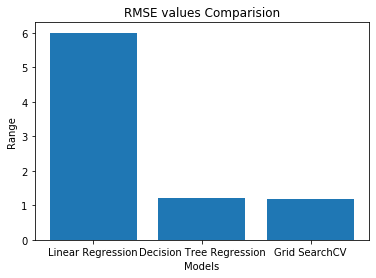

In [51]:
x=['Linear Regression','Decision Tree Regression','Grid SearchCV']
y=[5.998923574028056,1.2092470250832281,1.1880589789763267]
plt.bar(x,y)
plt.xlabel('Models')
plt.ylabel('Range')
plt.title('RMSE values Comparision')
plt.show()

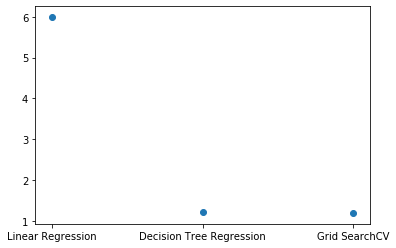

In [53]:
plt.scatter(x,y)
plt.show()

### Conclusion:

This means that we can predict RH using all the features together with Linear Regression and Decision Tree Regression.the RMSE value with Linear Regression is **5.99** and RMSE value with Decision tree Regression is **1.20** and after hyper parameter tuning we get similar accurate rmse value as **1.18**. 

As My RMSE values are in between 1-10,they fit properly.but,the accurate RMSE is given by **Grid SearchCV**.